# **Tugas Besar IF2120 Probabilitas dan Statistika 2025/2026**

### Topik : **Utility**


K01 & K03 - Kelompok 14

Anggota Kelompok :
1. Yusuf Faishal Listyardi - 13524014
2. Zahran Alvan Putra Winarko - 13524124

## Inisialisasi Dependencies dan Load Data

Import required libraries

In [98]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

Load Data

In [99]:
df = pd.read_csv("utility.csv")

# Soal General

## Nomor 1
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data.
- Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis.
- Data yang bersifat kategorikal dapat dicari unique values, dan proporsi nya.

#### Klasifikasi Type Kolom


In [100]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(f"\nKolom Numerik: {list(numeric_cols)}")
print(f"Kolom Kategorikal: {list(categorical_cols)}")


Kolom Numerik: ['billing_month', 'avg_temperature_c', 'household_size', 'working_days', 'water_liter', 'electricity_kwh', 'gas_m3', 'water_rate', 'electricity_rate', 'gas_rate']
Kolom Kategorikal: ['season', 'ownership_status', 'energy_efficiency_rating']


#### Data Numerik

Fungsi Manual Data Numerik

In [101]:
def hitungMean(data):
    return sum(data) / len(data)

def hitungMedian(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    if n % 2 == 0:
        return (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2
    else:
        return sorted_data[n//2]

def hitungModus(data):
    freq = {}
    for val in data:
        freq[val] = freq.get(val, 0) + 1
    max_freq = max(freq.values())
    modes = [k for k, v in freq.items() if v == max_freq]
    return modes[0] if len(modes) == 1 else modes

def hitungVariansi(data):
    mean = hitungMean(data)
    return sum((x - mean) ** 2 for x in data) / len(data)

def hitungStdev(data):
    return hitungVariansi(data) ** 0.5

def hitungKuartil(data, q):
    sorted_data = sorted(data)
    n = len(sorted_data)
    pos = (q / 4) * (n + 1)
    if pos.is_integer():
        return sorted_data[int(pos) - 1]
    else:
        lower = int(pos) - 1
        upper = lower + 1
        if upper >= n:
            return sorted_data[lower]
        fraction = pos - int(pos)
        return sorted_data[lower] + fraction * (sorted_data[upper] - sorted_data[lower])

def hitungSkewness(data):
    n = len(data)
    mean = hitungMean(data)
    std = hitungStdev(data)
    return sum(((x - mean) / std) ** 3 for x in data) / n

def hitung_kurtosis(data):
    n = len(data)
    mean = hitungMean(data)
    std = hitungStdev(data)
    return sum(((x - mean) / std) ** 4 for x in data) / n - 3

Fungsi Manual vs Library

In [102]:
for col in numeric_cols:
    print(f"\n{'-'*80}")
    print(f"Kolom: {col} (Numerik)")
    print(f"{'-'*80}")

    data = df[col].dropna().tolist()

    # Hitung manual
    mean_manual = hitungMean(data)
    median_manual = hitungMedian(data)
    modus_manual = hitungModus(data)
    var_manual = hitungVariansi(data)
    std_manual = hitungStdev(data)
    min_val = min(data)
    max_val = max(data)
    range_val = max_val - min_val
    q1_manual = hitungKuartil(data, 1)
    q2_manual = hitungKuartil(data, 2)
    q3_manual = hitungKuartil(data, 3)
    iqr_manual = q3_manual - q1_manual
    skew_manual = hitungSkewness(data)
    kurt_manual = hitung_kurtosis(data)

    # Hitung library
    data_series = df[col].dropna()
    mean_lib = data_series.mean()
    median_lib = data_series.median()
    modus_lib = data_series.mode()[0] if len(data_series.mode()) > 0 else modus_manual
    var_lib = data_series.var(ddof=0)
    std_lib = data_series.std(ddof=0)
    min_lib = data_series.min()
    max_lib = data_series.max()
    range_lib = max_lib - min_lib
    q1_lib = data_series.quantile(0.25)
    q2_lib = data_series.quantile(0.50)
    q3_lib = data_series.quantile(0.75)
    iqr_lib = q3_lib - q1_lib
    skew_lib = stats.skew(data_series)
    kurt_lib = stats.kurtosis(data_series)

    # Tampilkan perbandingan
    print(f"\n{'Statistik':<20} {'Manual':<20} {'Library':<20} {'Selisih':<20}")
    print(f"{'-'*80}")
    print(f"{'Mean':<20} {mean_manual:<20.6f} {mean_lib:<20.6f} {abs(mean_manual-mean_lib):<20.8f}")
    print(f"{'Median':<20} {median_manual:<20.6f} {median_lib:<20.6f} {abs(median_manual-median_lib):<20.8f}")
    print(f"{'Modus':<20} {modus_manual if isinstance(modus_manual, (int, float)) else modus_manual[0]:<20.6f} {modus_lib:<20.6f} {'-':<20}")
    print(f"{'Std Deviasi':<20} {std_manual:<20.6f} {std_lib:<20.6f} {abs(std_manual-std_lib):<20.8f}")
    print(f"{'Variansi':<20} {var_manual:<20.6f} {var_lib:<20.6f} {abs(var_manual-var_lib):<20.8f}")
    print(f"{'Min':<20} {min_val:<20.6f} {min_lib:<20.6f} {abs(min_val-min_lib):<20.8f}")
    print(f"{'Max':<20} {max_val:<20.6f} {max_lib:<20.6f} {abs(max_val-max_lib):<20.8f}")
    print(f"{'Range':<20} {range_val:<20.6f} {range_lib:<20.6f} {abs(range_val-range_lib):<20.8f}")
    print(f"{'Q1':<20} {q1_manual:<20.6f} {q1_lib:<20.6f} {abs(q1_manual-q1_lib):<20.8f}")
    print(f"{'Q2':<20} {q2_manual:<20.6f} {q2_lib:<20.6f} {abs(q2_manual-q2_lib):<20.8f}")
    print(f"{'Q3':<20} {q3_manual:<20.6f} {q3_lib:<20.6f} {abs(q3_manual-q3_lib):<20.8f}")
    print(f"{'IQR':<20} {iqr_manual:<20.6f} {iqr_lib:<20.6f} {abs(iqr_manual-iqr_lib):<20.8f}")
    print(f"{'Skewness':<20} {skew_manual:<20.6f} {skew_lib:<20.6f} {abs(skew_manual-skew_lib):<20.8f}")
    print(f"{'Kurtosis':<20} {kurt_manual:<20.6f} {kurt_lib:<20.6f} {abs(kurt_manual-kurt_lib):<20.8f}")


--------------------------------------------------------------------------------
Kolom: billing_month (Numerik)
--------------------------------------------------------------------------------

Statistik            Manual               Library              Selisih             
--------------------------------------------------------------------------------
Mean                 5.881600             5.881600             0.00000000          
Median               6.000000             6.000000             0.00000000          
Modus                12.000000            12.000000            -                   
Std Deviasi          3.977786             3.977786             0.00000000          
Variansi             15.822781            15.822781            0.00000000          
Min                  1.000000             1.000000             0.00000000          
Max                  12.000000            12.000000            0.00000000          
Range                11.000000            11.000000 

#### Data Kategorikal

Fungsi Manual Data Kategorikal

In [103]:
def hitungFrekuensiKategori(data):
    freq = {}
    for val in data:
        freq[val] = freq.get(val, 0) + 1
    return freq

def hitungPersentaseKategori(freq, total):
    persen = {}
    if total == 0:
        return {k: 0.0 for k in freq}
    for k, v in freq.items():
        persen[k] = v / total * 100
    return persen

def hitungModusKategori(freq):
    if not freq:
        return None
    max_freq = max(freq.values())
    modes = [k for k, v in freq.items() if v == max_freq]
    return modes[0] if len(modes) == 1 else modes

Fungsi Manual vs Library

In [104]:
for col in categorical_cols:
    print(f"\n{'-'*100}")
    print(f"Kolom: {col} (Kategorikal)")
    print(f"{'-'*100}")

    # Hitung Manual
    data = df[col].dropna().tolist()

    freq_manual = hitungFrekuensiKategori(data)
    total_manual = len(data)
    persen_manual = hitungPersentaseKategori(freq_manual, total_manual)
    modus_manual = hitungModusKategori(freq_manual)
    unique_manual = len(freq_manual)

    print("MANUAL")
    print(f"Total Data (non-NaN) : {total_manual}")
    print(f"Jumlah Kategori Unik : {unique_manual}")
    print(f"Modus (Manual)       : {modus_manual}")

    # Hitung Library
    series_cat = df[col].dropna()

    freq_lib_series = series_cat.value_counts()
    pct_lib_series  = series_cat.value_counts(normalize=True) * 100

    freq_lib = freq_lib_series.to_dict()
    pct_lib  = pct_lib_series.to_dict()

    total_lib  = series_cat.shape[0]
    unique_lib = series_cat.nunique()
    modus_lib  = series_cat.mode()[0] if len(series_cat.mode()) > 0 else None

    print("\nHASIL LIBRARY ")
    print(f"Total Data (non-NaN) : {total_lib}")
    print(f"Jumlah Kategori Unik : {unique_lib}")
    print(f"Modus (Library)      : {modus_lib}")


    print(f"\n{'Kategori':<25} {'Freq_Manual':>12} {'Freq_Lib':>10} {'ΔFreq':>10} {'%_Manual':>12} {'%_Lib':>10} {'Δ%':>10}")
    print(f"{'-'*100}")

    # Tampilkan Perbandingan
    all_categories = sorted(set(freq_manual.keys()) | set(freq_lib.keys()))

    for cat in all_categories:
        f_man = freq_manual.get(cat, 0)
        f_lib = freq_lib.get(cat, 0)
        d_freq = f_man - f_lib

        p_man = persen_manual.get(cat, 0.0)
        p_lib = pct_lib.get(cat, 0.0)
        d_pct = p_man - p_lib

        print(f"{str(cat):<25} {f_man:>12} {f_lib:>10} {d_freq:>10} {p_man:>12.2f} {p_lib:>10.2f} {d_pct:>10.2f}")


----------------------------------------------------------------------------------------------------
Kolom: season (Kategorikal)
----------------------------------------------------------------------------------------------------
MANUAL
Total Data (non-NaN) : 5000
Jumlah Kategori Unik : 2
Modus (Manual)       : Winter

HASIL LIBRARY 
Total Data (non-NaN) : 5000
Jumlah Kategori Unik : 2
Modus (Library)      : Winter

Kategori                   Freq_Manual   Freq_Lib      ΔFreq     %_Manual      %_Lib         Δ%
----------------------------------------------------------------------------------------------------
Summer                            2065       2065          0        41.30      41.30       0.00
Winter                            2935       2935          0        58.70      58.70       0.00

----------------------------------------------------------------------------------------------------
Kolom: ownership_status (Kategorikal)
--------------------------------------------------

## Nomor 2

### Deteksi Outlier

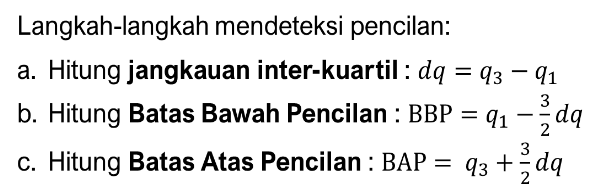

In [105]:
def deteksiOutlier_iqr(data):
    sorted_data = sorted(data)
    n = len(sorted_data)

    q1_pos = 0.25 * (n + 1)
    if q1_pos.is_integer():
        q1 = sorted_data[int(q1_pos) - 1]
    else:
        lower = int(q1_pos) - 1
        upper = lower + 1
        fraction = q1_pos - int(q1_pos)
        q1 = sorted_data[lower] + fraction * (sorted_data[upper] - sorted_data[lower])

    q3_pos = 0.75 * (n + 1)
    if q3_pos.is_integer():
        q3 = sorted_data[int(q3_pos) - 1]
    else:
        lower = int(q3_pos) - 1
        upper = lower + 1
        fraction = q3_pos - int(q3_pos)
        q3 = sorted_data[lower] + fraction * (sorted_data[upper] - sorted_data[lower])

    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    outlier_indices = [i for i, x in enumerate(data) if x < lower_bound or x > upper_bound]

    return {
        'q1': q1, 'q3': q3, 'iqr': iqr,
        'lower_bound': lower_bound, 'upper_bound': upper_bound,
        'outliers': outliers, 'outlier_indices': outlier_indices,
        'n_outliers': len(outliers),
        'pct_outliers': (len(outliers) / len(data)) * 100
    }

outlier_results = {}

for col in numeric_cols:
    data = df[col].dropna().tolist()
    result = deteksiOutlier_iqr(data)
    outlier_results[col] = result

    print(f"\n{col}:")
    print(f"  Q1: {result['q1']:.4f}")
    print(f"  Q3: {result['q3']:.4f}")
    print(f"  IQR: {result['iqr']:.4f}")
    print(f"  Batas Bawah: {result['lower_bound']:.4f}")
    print(f"  Batas Atas: {result['upper_bound']:.4f}")
    print(f"  Jumlah Outlier: {result['n_outliers']} ({result['pct_outliers']:.2f}%)")


billing_month:
  Q1: 2.0000
  Q3: 8.0000
  IQR: 6.0000
  Batas Bawah: -7.0000
  Batas Atas: 17.0000
  Jumlah Outlier: 0 (0.00%)

avg_temperature_c:
  Q1: 9.6000
  Q3: 27.4000
  IQR: 17.8000
  Batas Bawah: -17.1000
  Batas Atas: 54.1000
  Jumlah Outlier: 0 (0.00%)

household_size:
  Q1: 2.0000
  Q3: 5.0000
  IQR: 3.0000
  Batas Bawah: -2.5000
  Batas Atas: 9.5000
  Jumlah Outlier: 0 (0.00%)

working_days:
  Q1: 22.0000
  Q3: 26.0000
  IQR: 4.0000
  Batas Bawah: 16.0000
  Batas Atas: 32.0000
  Jumlah Outlier: 7 (0.14%)

water_liter:
  Q1: 6333.8000
  Q3: 15473.0500
  IQR: 9139.2500
  Batas Bawah: -7375.0750
  Batas Atas: 29181.9250
  Jumlah Outlier: 0 (0.00%)

electricity_kwh:
  Q1: 298.4300
  Q3: 786.6700
  IQR: 488.2400
  Batas Bawah: -433.9300
  Batas Atas: 1519.0300
  Jumlah Outlier: 29 (0.58%)

gas_m3:
  Q1: 50.0425
  Q3: 149.9475
  IQR: 99.9050
  Batas Bawah: -99.8150
  Batas Atas: 299.8050
  Jumlah Outlier: 4 (0.08%)

water_rate:
  Q1: 0.0012
  Q3: 0.0018
  IQR: 0.0006
  Batas Ba

### Visualisasi box plot

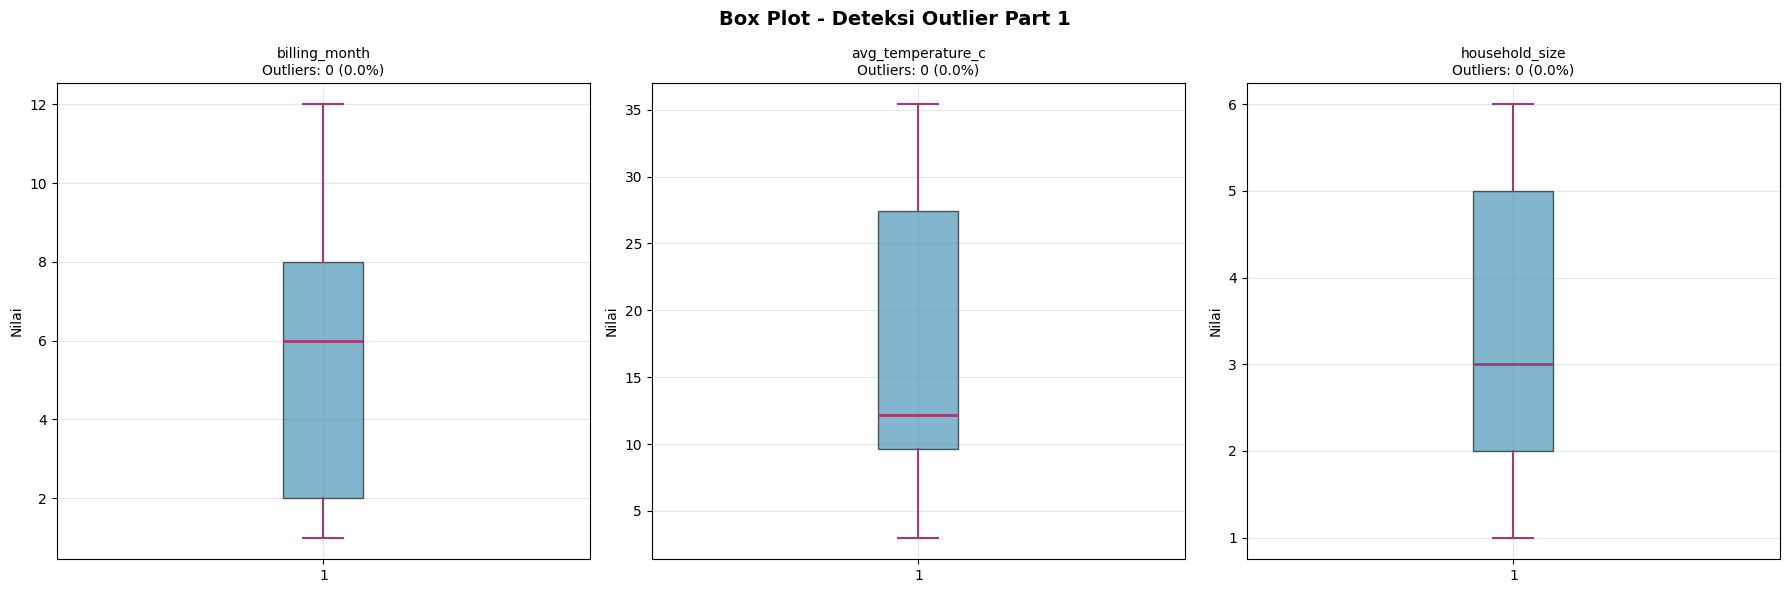

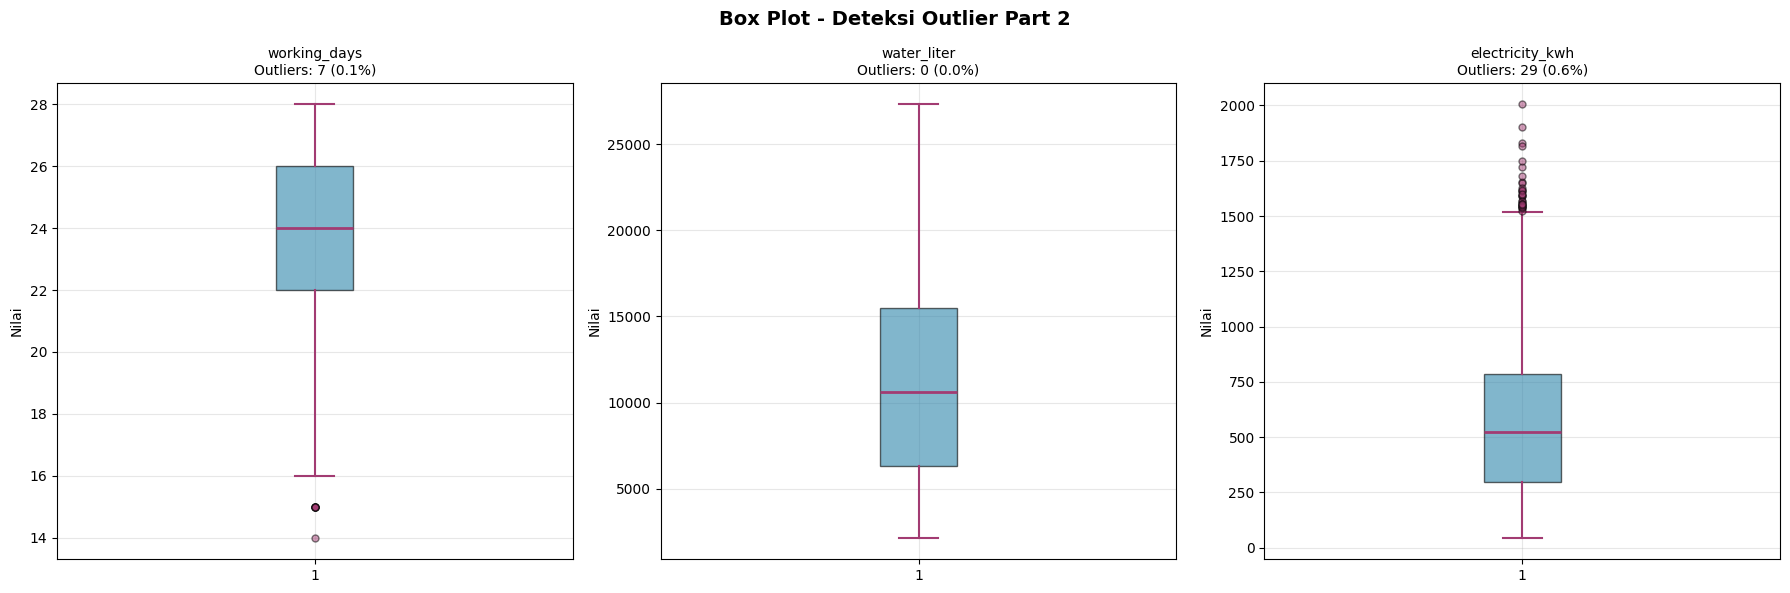

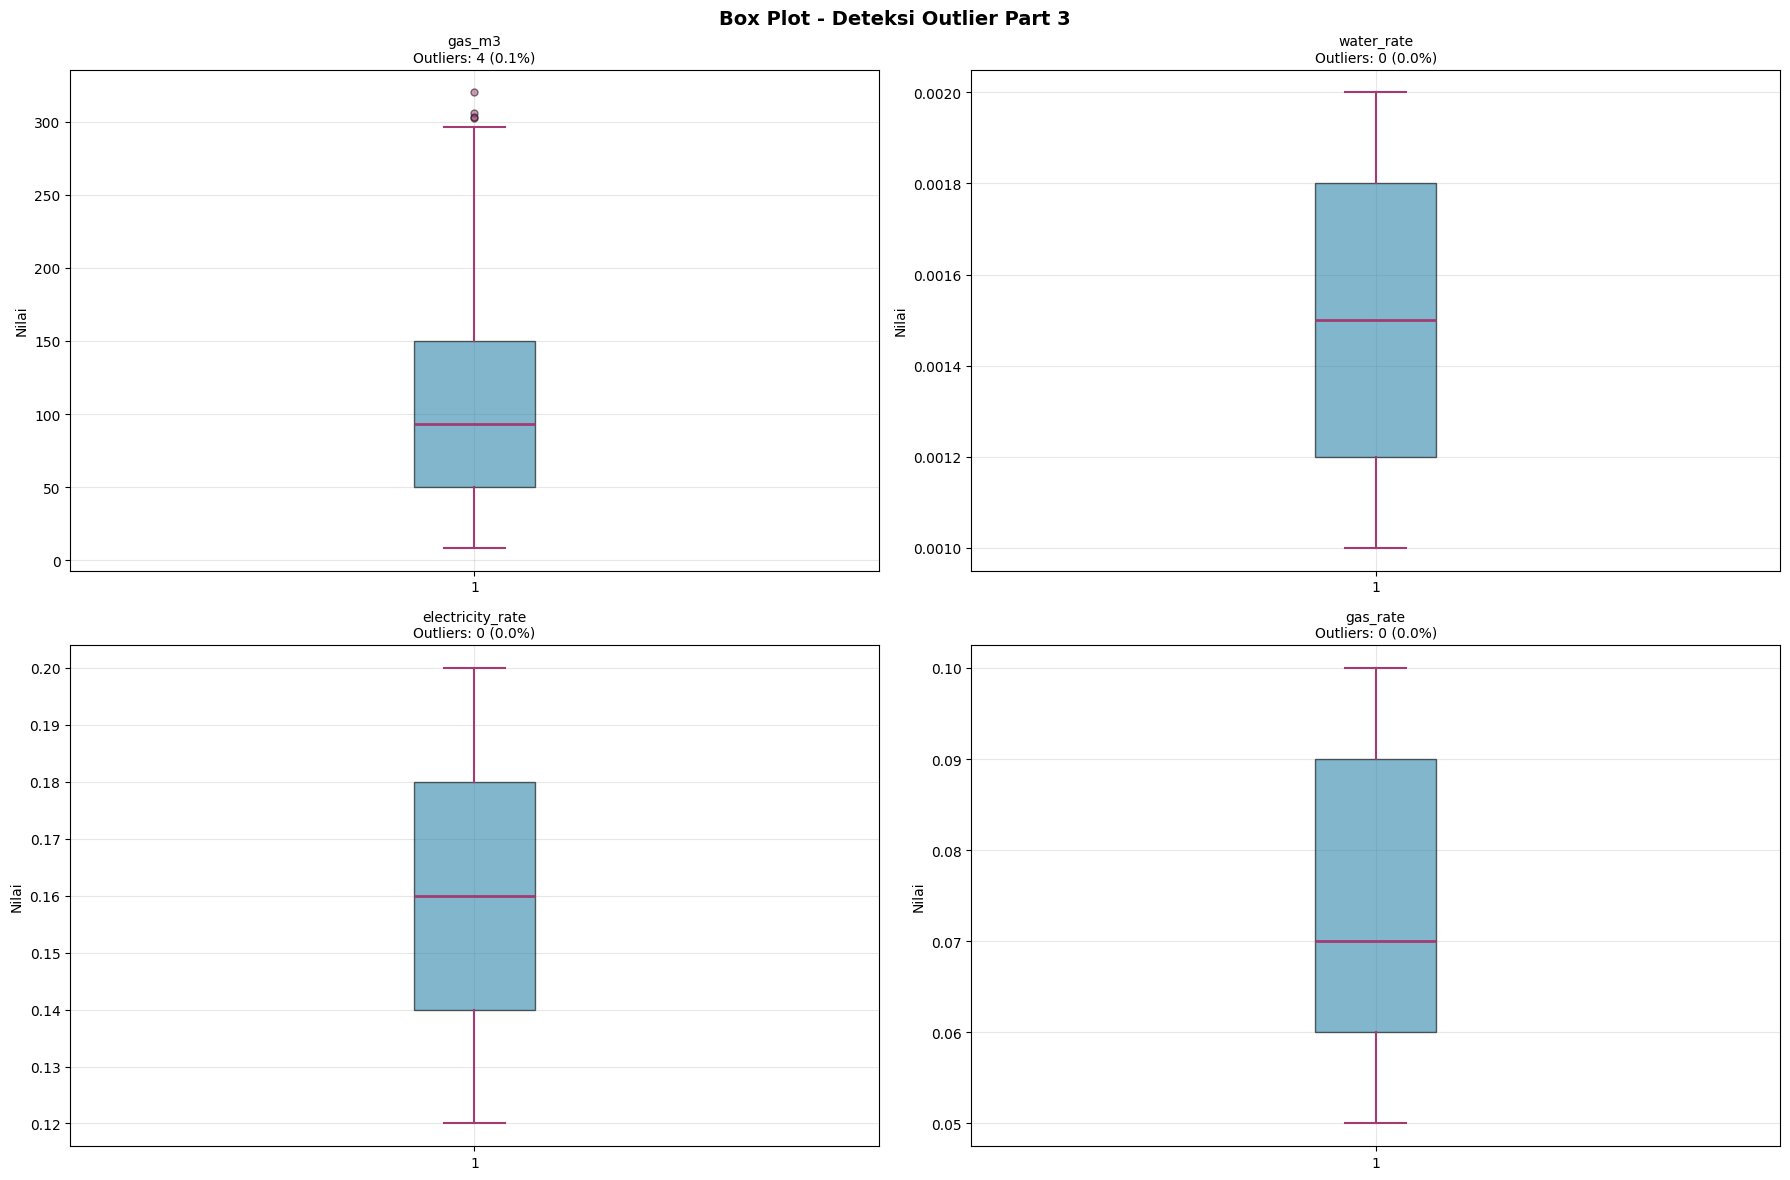

In [106]:
# Visualisasi box plot
COLOR_1 = '#2E86AB'
COLOR_2 = '#A23B72'
numeric_list = list(numeric_cols)
groups = [numeric_list[:3], numeric_list[3:6], numeric_list[6:]]

for idx, group in enumerate(groups, 1):
    if len(group) == 0:
        continue

    if len(group) <= 3:
        fig, axes = plt.subplots(1, len(group), figsize=(18, 6))
    else:
        fig, axes = plt.subplots(2, 2, figsize=(18, 12))

    fig.suptitle(f'Box Plot - Deteksi Outlier Part {idx}', fontsize=14, fontweight='bold')

    if len(group) == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if len(group) > 3 else axes

    for i, col in enumerate(group):
        ax = axes[i]
        data = df[col].dropna()

        bp = ax.boxplot(data, vert=True, patch_artist=True,
                       boxprops=dict(facecolor=COLOR_1, alpha=0.6),
                       medianprops=dict(color=COLOR_2, linewidth=2),
                       whiskerprops=dict(color=COLOR_2, linewidth=1.5),
                       capprops=dict(color=COLOR_2, linewidth=1.5),
                       flierprops=dict(marker='o', markerfacecolor=COLOR_2, markersize=5, alpha=0.5))

        result = outlier_results[col]
        ax.set_title(f'{col}\nOutliers: {result["n_outliers"]} ({result["pct_outliers"]:.1f}%)', fontsize=10)
        ax.set_ylabel('Nilai')
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show(block=True)

### Cara penanganan outlier

 *   Kolom yang outlier adalah kolom working_days, electricity_kwh, gas_m3. Working
*   Kolom working_days dan gas_m3 memiliki jumlah outlier yang relatif kecil yaitu 7 dan 3 outlier. Sehingga penanganan yang cocok untuk outlier pada kolom ini adalah menghapus baris yang berkorespondensi dengan outlier tersebut, karena mengapus sedikit data outlier tidak akan berpengaruh besar terhadap keseluruhan data
*   Sedangkan kolom electricity_kwh memiliki outlier yang cukup banyak di angka 27 outlier, maka cara penanganan yang baik adalah mengganti outlier dengan nilai median

### Apa yang umumnya dilakukan untuk menangani outlier

1. Menghapus Outlier (Removal)

   Menghapus data yang jelas salah atau ekstrem jika jumlahnya sedikit dan jelas bukan representasi populasi.

2. Transformasi Data

   Menggunakan log, sqrt, atau box-cox untuk mengecilkan efek nilai ekstrem.

3. Winsorizing / Capping

   Mengganti nilai di luar persentil tertentu (misal 1% dan 99%) dengan batas tersebut.

4. Imputasi

   Mengganti outlier dengan nilai mean/median atau nilai prediksi model.

## Nomor 3
Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika kategorikal dengan histogram.

### Kolom Billing Month

Visualisasi kolom billing_month


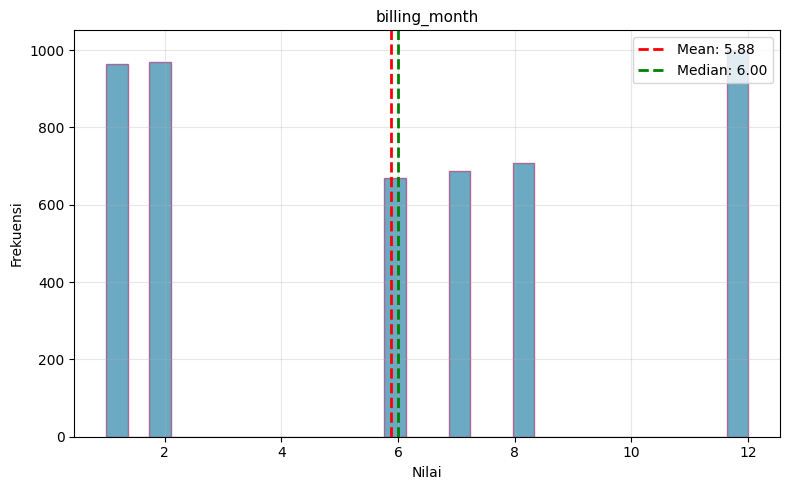

In [107]:
# Histogram untuk kolom billing_month
print("Visualisasi kolom billing_month")

fig, ax = plt.subplots(figsize=(8, 5))

data = df["billing_month"].dropna()

ax.hist(data, bins=30, color=COLOR_1, alpha=0.7, edgecolor=COLOR_2)
ax.set_title("billing_month", fontsize=11)
ax.set_xlabel("Nilai")
ax.set_ylabel("Frekuensi")
ax.grid(True, alpha=0.3)

mean_val = data.mean()
median_val = data.median()
ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_val:.2f}")
ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f"Median: {median_val:.2f}")
ax.legend()

plt.tight_layout()
plt.show()


Insight yang didapat

* Mean = 5.88,
* Median = 6.00
* Mean < Median maka dapat disimpulkan data kolom billing month memiliki kemiringan negatif


### Kolom Average Temperature C

Visualisasi kolom avg_temperature_c


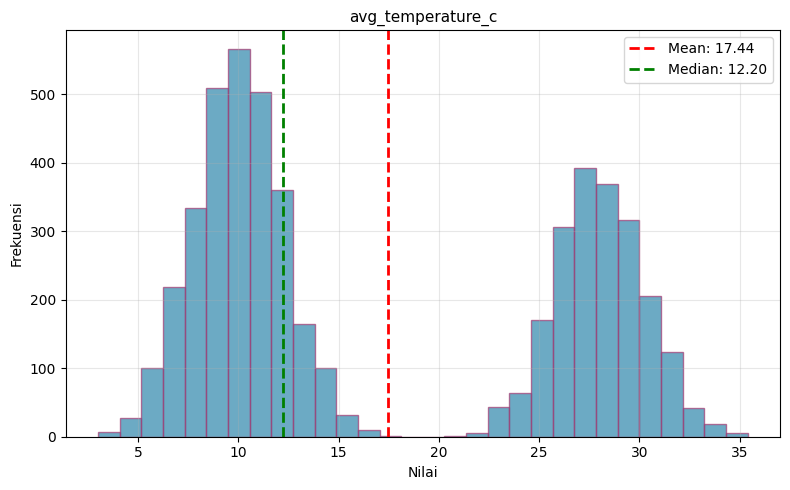

In [108]:
# Histogram untuk kolom avg_temperature_c
print("Visualisasi kolom avg_temperature_c")

fig, ax = plt.subplots(figsize=(8, 5))

data = df["avg_temperature_c"].dropna()

ax.hist(data, bins=30, color=COLOR_1, alpha=0.7, edgecolor=COLOR_2)
ax.set_title("avg_temperature_c", fontsize=11)
ax.set_xlabel("Nilai")
ax.set_ylabel("Frekuensi")
ax.grid(True, alpha=0.3)

mean_val = data.mean()
median_val = data.median()
ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_val:.2f}")
ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f"Median: {median_val:.2f}")
ax.legend()

plt.tight_layout()
plt.show()


Insight yang didapat

* Mean = 17.44
* Median = 12.20
* Mean > Median maka dapat disimpulkan data kolom average temperature memiliki kemiringan positif


### Kolom Houshold Size

Visualisasi kolom household_size


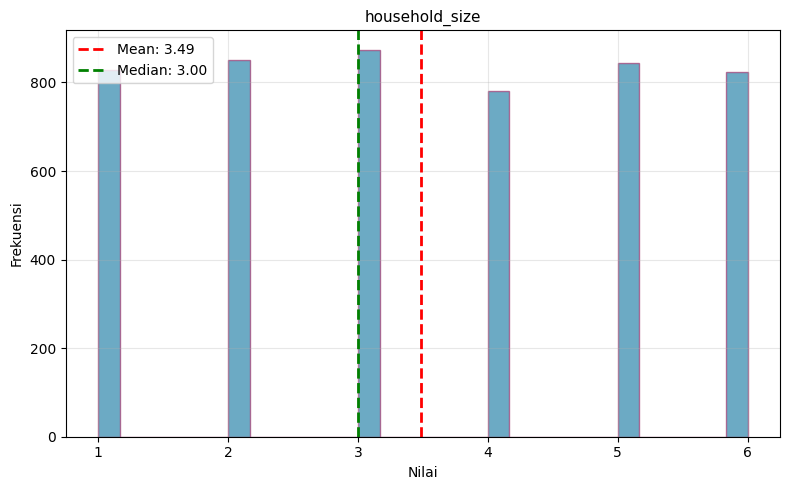

In [109]:
# Histogram untuk kolom household_size
print("Visualisasi kolom household_size")

fig, ax = plt.subplots(figsize=(8, 5))

data = df["household_size"].dropna()

ax.hist(data, bins=30, color=COLOR_1, alpha=0.7, edgecolor=COLOR_2)
ax.set_title("household_size", fontsize=11)
ax.set_xlabel("Nilai")
ax.set_ylabel("Frekuensi")
ax.grid(True, alpha=0.3)

mean_val = data.mean()
median_val = data.median()
ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_val:.2f}")
ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f"Median: {median_val:.2f}")
ax.legend()

plt.tight_layout()
plt.show()


Insight yang didapat

* Mean = 3.49
* Median = 3.00
* Mean > Median maka dapat disimpulkan data kolom household size memiliki kemiringan positif


### Kolom Working Days

Visualisasi kolom working_days


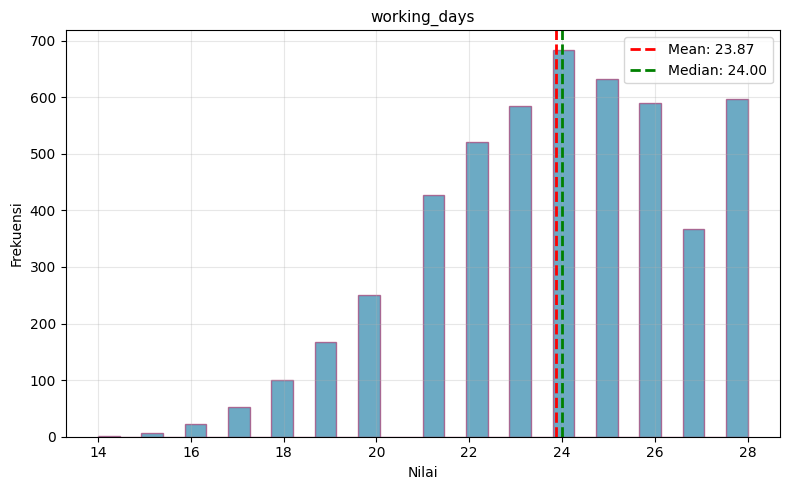

In [110]:
# Histogram untuk kolom working_days
print("Visualisasi kolom working_days")

fig, ax = plt.subplots(figsize=(8, 5))

data = df["working_days"].dropna()

ax.hist(data, bins=30, color=COLOR_1, alpha=0.7, edgecolor=COLOR_2)
ax.set_title("working_days", fontsize=11)
ax.set_xlabel("Nilai")
ax.set_ylabel("Frekuensi")
ax.grid(True, alpha=0.3)

mean_val = data.mean()
median_val = data.median()
ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_val:.2f}")
ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f"Median: {median_val:.2f}")
ax.legend()

plt.tight_layout()
plt.show()


Insight yang didapat

* Mean = 23.87
* Median = 24.00
* Mean < Median maka dapat disimpulkan data kolom working days memiliki kemiringan negatif


### Kolom Water Liter

Visualisasi kolom water_liter


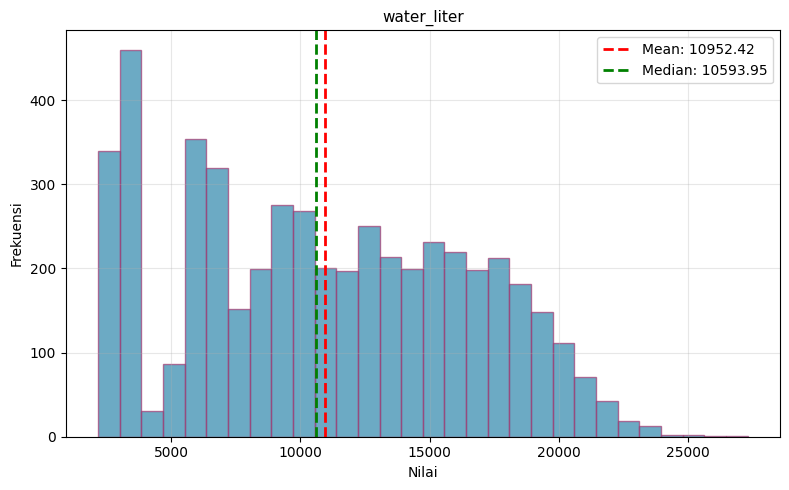

In [111]:
# Histogram untuk kolom water_liter
print("Visualisasi kolom water_liter")

fig, ax = plt.subplots(figsize=(8, 5))

data = df["water_liter"].dropna()

ax.hist(data, bins=30, color=COLOR_1, alpha=0.7, edgecolor=COLOR_2)
ax.set_title("water_liter", fontsize=11)
ax.set_xlabel("Nilai")
ax.set_ylabel("Frekuensi")
ax.grid(True, alpha=0.3)

mean_val = data.mean()
median_val = data.median()
ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_val:.2f}")
ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f"Median: {median_val:.2f}")
ax.legend()

plt.tight_layout()
plt.show()


Insight yang didapat

* Mean = 10952.42
* Median = 10593.85
* Mean > Median maka dapat disimpulkan data kolom water liter memiliki kemiringan positif


### Kolom Electricity Kwh

Visualisasi kolom electricity_kwh


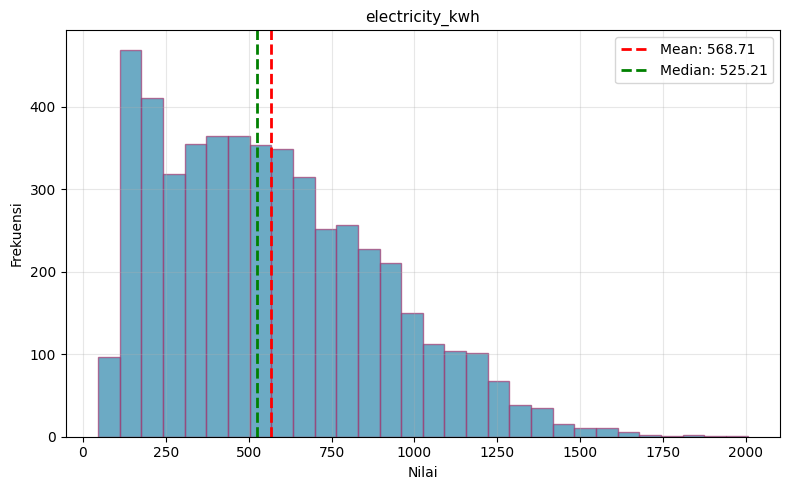

In [112]:
# Histogram untuk kolom electricity_kwh
print("Visualisasi kolom electricity_kwh")

fig, ax = plt.subplots(figsize=(8, 5))

data = df["electricity_kwh"].dropna()

ax.hist(data, bins=30, color=COLOR_1, alpha=0.7, edgecolor=COLOR_2)
ax.set_title("electricity_kwh", fontsize=11)
ax.set_xlabel("Nilai")
ax.set_ylabel("Frekuensi")
ax.grid(True, alpha=0.3)

mean_val = data.mean()
median_val = data.median()
ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_val:.2f}")
ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f"Median: {median_val:.2f}")
ax.legend()

plt.tight_layout()
plt.show()


Insight yang didapat

* Mean = 568.71
* Median = 525.21
* Mean > Median maka dapat disimpulkan data kolom electricity kwh memiliki kemiringan positif

### Kolom Gas m3

Visualisasi kolom gas_m3


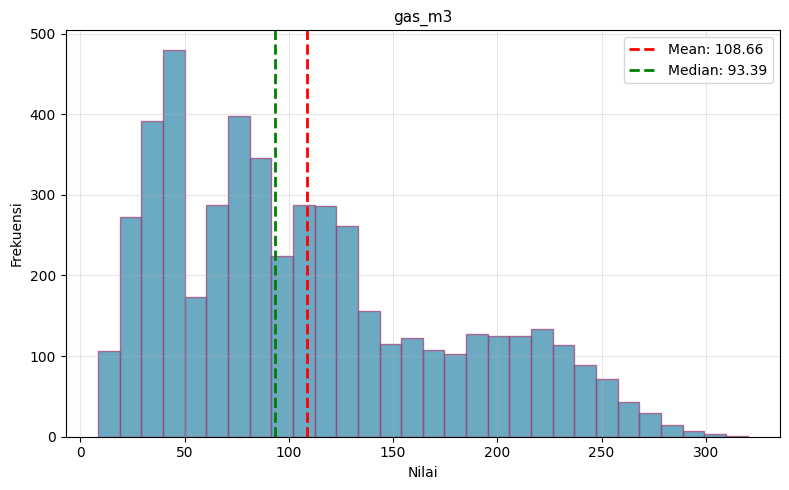

In [113]:
# Histogram untuk kolom gas_m3
print("Visualisasi kolom gas_m3")

fig, ax = plt.subplots(figsize=(8, 5))

data = df["gas_m3"].dropna()

ax.hist(data, bins=30, color=COLOR_1, alpha=0.7, edgecolor=COLOR_2)
ax.set_title("gas_m3", fontsize=11)
ax.set_xlabel("Nilai")
ax.set_ylabel("Frekuensi")
ax.grid(True, alpha=0.3)

mean_val = data.mean()
median_val = data.median()
ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_val:.2f}")
ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f"Median: {median_val:.2f}")
ax.legend()

plt.tight_layout()
plt.show()


Insight yang didapat

* Mean = 108.66
* Median = 93.39
* Mean > Median maka dapat disimpulkan data kolom gas m3 memiliki kemiringan positif

### Kolom Water Rate

Visualisasi kolom water_rate


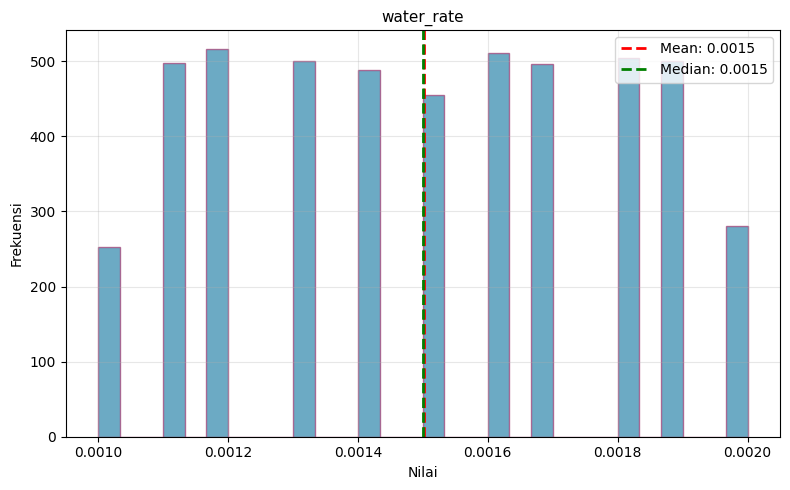

In [114]:
# Histogram untuk kolom water_rate
print("Visualisasi kolom water_rate")

fig, ax = plt.subplots(figsize=(8, 5))

data = df["water_rate"].dropna()

ax.hist(data, bins=30, color=COLOR_1, alpha=0.7, edgecolor=COLOR_2)
ax.set_title("water_rate", fontsize=11)
ax.set_xlabel("Nilai")
ax.set_ylabel("Frekuensi")
ax.grid(True, alpha=0.3)

mean_val = data.mean()
median_val = data.median()
ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_val:.4f}")
ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f"Median: {median_val:.4f}")
ax.legend()

plt.tight_layout()
plt.show()


Insight yang didapat

* Mean = 0.0015
* Median = 0.0015
* Mean = Median maka dapat disimpulkan data kolom water rate memiliki simetris

### Kolom Electricity Rate

Visualisasi kolom electricity_rate


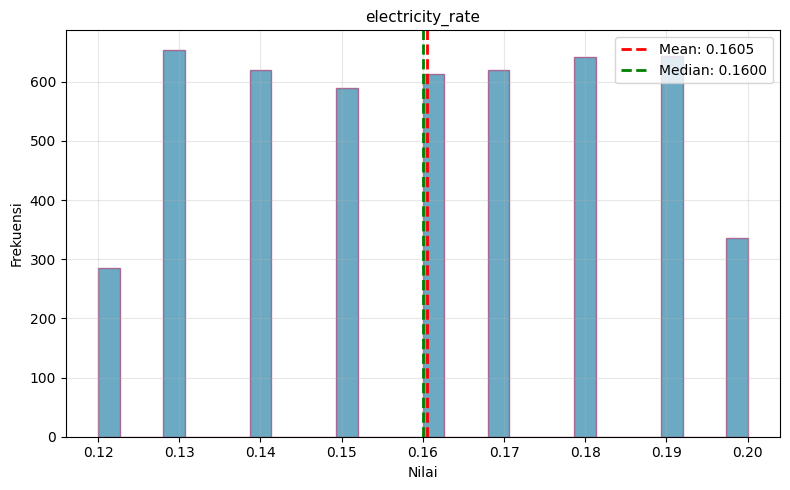

In [115]:
# Histogram untuk kolom electricity_rate
print("Visualisasi kolom electricity_rate")

fig, ax = plt.subplots(figsize=(8, 5))

data = df["electricity_rate"].dropna()

ax.hist(data, bins=30, color=COLOR_1, alpha=0.7, edgecolor=COLOR_2)
ax.set_title("electricity_rate", fontsize=11)
ax.set_xlabel("Nilai")
ax.set_ylabel("Frekuensi")
ax.grid(True, alpha=0.3)

mean_val = data.mean()
median_val = data.median()
ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_val:.4f}")
ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f"Median: {median_val:.4f}")
ax.legend()

plt.tight_layout()
plt.show()


Insight yang didapat

* Mean = 0.1605
* Median = 0.1600
* Mean > Median maka dapat disimpulkan data kolom electricity rate memiliki kemiringan positif

### Kolom Gas Rate

Visualisasi kolom gas_rate


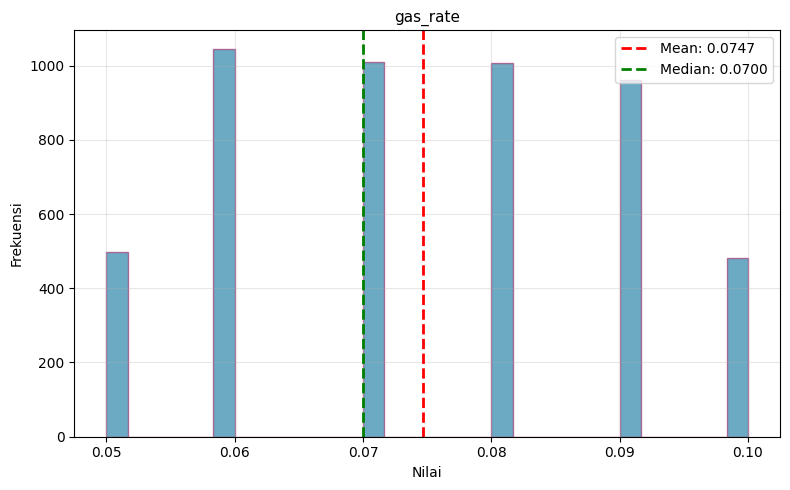

In [116]:
# Histogram untuk kolom gas_rate
print("Visualisasi kolom gas_rate")

fig, ax = plt.subplots(figsize=(8, 5))

data = df["gas_rate"].dropna()

ax.hist(data, bins=30, color=COLOR_1, alpha=0.7, edgecolor=COLOR_2)
ax.set_title("gas_rate", fontsize=11)
ax.set_xlabel("Nilai")
ax.set_ylabel("Frekuensi")
ax.grid(True, alpha=0.3)

mean_val = data.mean()
median_val = data.median()
ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_val:.4f}")
ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f"Median: {median_val:.4f}")
ax.legend()

plt.tight_layout()
plt.show()


Insight yang didapat

* Mean = 0.0747
* Median = 0.0700
* Mean > Median maka dapat disimpulkan data kolom gas rate memiliki kemiringan positif

### Kolom Season

Visualisasi kolom season


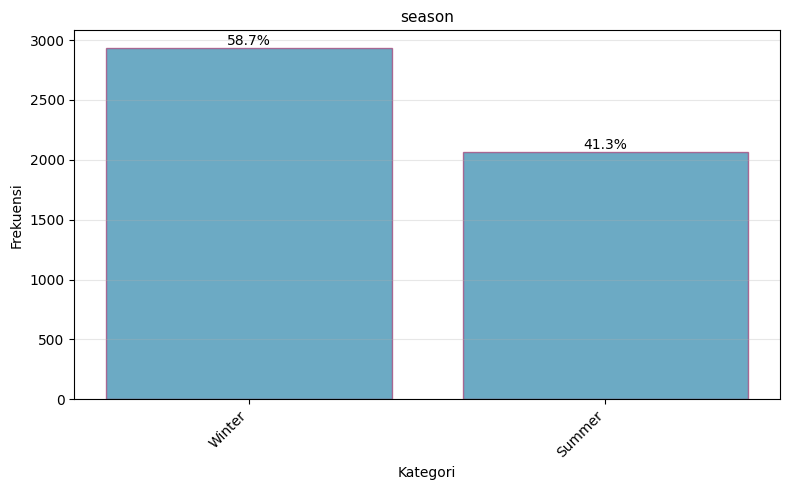

In [117]:
# Bar chart untuk kolom season
print("Visualisasi kolom season")

fig, ax = plt.subplots(figsize=(8, 5))

freq = df["season"].value_counts()

ax.bar(range(len(freq)), freq.values, color=COLOR_1, alpha=0.7, edgecolor=COLOR_2)
ax.set_title("season", fontsize=11)
ax.set_xlabel("Kategori")
ax.set_ylabel("Frekuensi")
ax.set_xticks(range(len(freq)))
ax.set_xticklabels(freq.index, rotation=45, ha="right")
ax.grid(True, alpha=0.3, axis="y")

for j, val in enumerate(freq.values):
    pct = (val / len(df["season"].dropna())) * 100
    ax.text(j, val, f"{pct:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()


Insight yang didapat

* Winter = 58.7%
* Summer = 41.3%

Kolom Ownership Status

Visualisasi kolom ownership_status


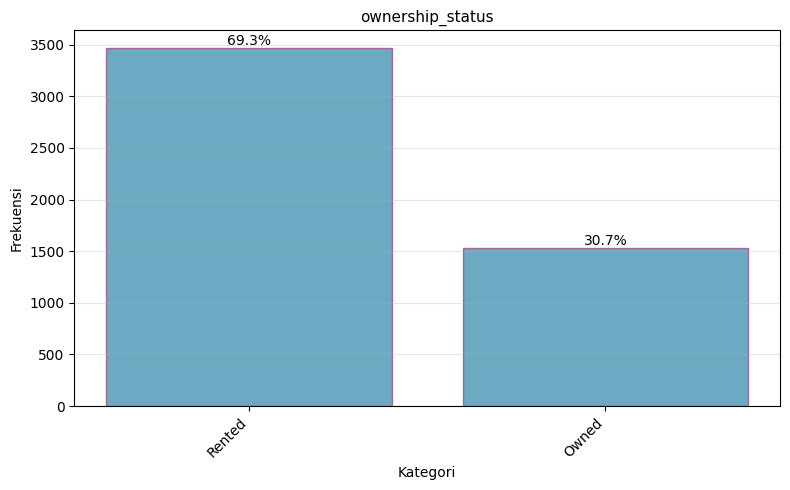

In [118]:
# Bar chart untuk kolom ownership_status
print("Visualisasi kolom ownership_status")

fig, ax = plt.subplots(figsize=(8, 5))

freq = df["ownership_status"].value_counts()

ax.bar(range(len(freq)), freq.values, color=COLOR_1, alpha=0.7, edgecolor=COLOR_2)
ax.set_title("ownership_status", fontsize=11)
ax.set_xlabel("Kategori")
ax.set_ylabel("Frekuensi")
ax.set_xticks(range(len(freq)))
ax.set_xticklabels(freq.index, rotation=45, ha="right")
ax.grid(True, alpha=0.3, axis="y")

for j, val in enumerate(freq.values):
    pct = (val / len(df["ownership_status"].dropna())) * 100
    ax.text(j, val, f"{pct:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()


Insight yang didapat

* Rented: 69.3%
* Owned: 30.7%

### Kolom Energy Efficiency Rating

Visualisasi kolom energy_efficiency_rating


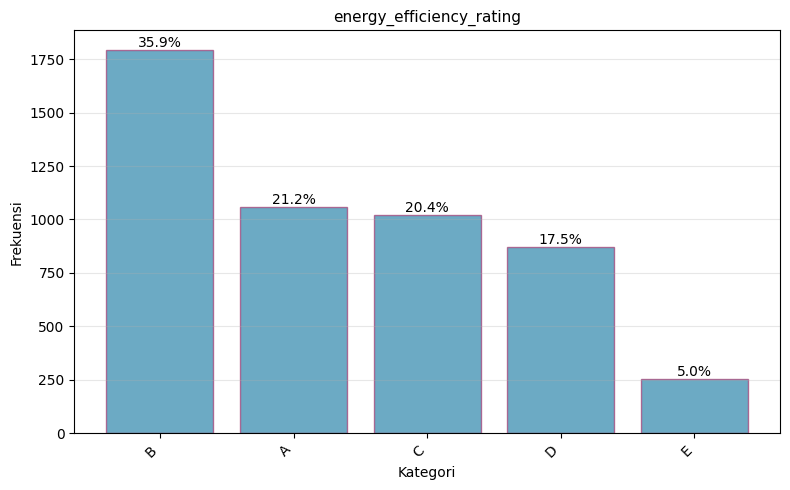

In [119]:
# Bar chart untuk kolom energy_efficiency_rating
print("Visualisasi kolom energy_efficiency_rating")

fig, ax = plt.subplots(figsize=(8, 5))

freq = df["energy_efficiency_rating"].value_counts()

ax.bar(range(len(freq)), freq.values, color=COLOR_1, alpha=0.7, edgecolor=COLOR_2)
ax.set_title("energy_efficiency_rating", fontsize=11)
ax.set_xlabel("Kategori")
ax.set_ylabel("Frekuensi")
ax.set_xticks(range(len(freq)))
ax.set_xticklabels(freq.index, rotation=45, ha="right")
ax.grid(True, alpha=0.3, axis="y")

for j, val in enumerate(freq.values):
    pct = (val / len(df["energy_efficiency_rating"].dropna())) * 100
    ax.text(j, val, f"{pct:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()


Insight yang didapat

* B: 35.9%
* A: 21.2%
* C: 20.4%
* D: 17.5%
* E: 5.0%

## Nomor 4
Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?

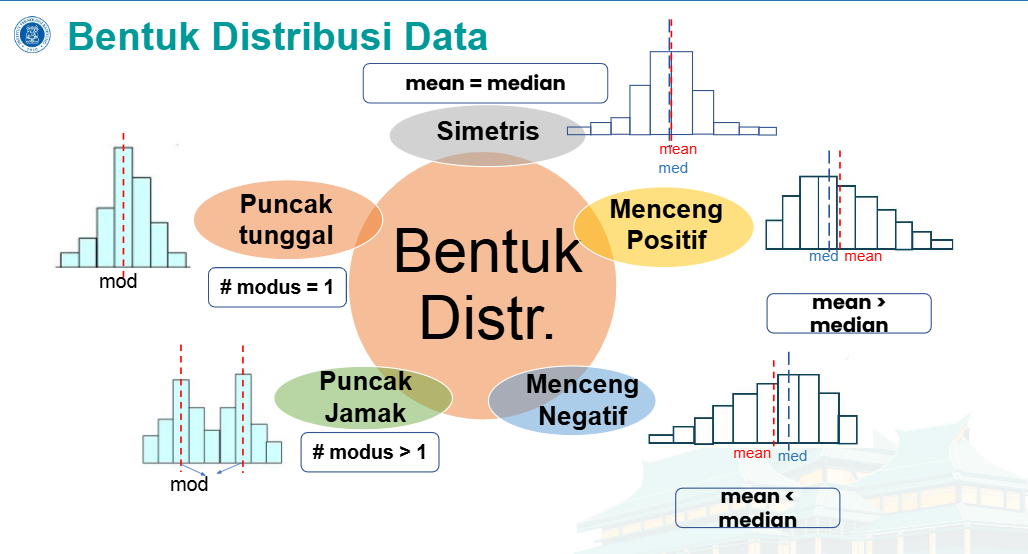

Cara penentuan berdasarkan nilai mean dan median yang terlihat pada visualisasi histogram, jika mean = median, maka kolom berdistribusi normal, jika mean > median maka kolom berdistribusi miring ke kanan (right skewed), jika mean < median maka kolom kolom berdistribusi miring ke kiri (left skewed).

1. Kolom Billing Month : Mean < Median, maka kolom berdistribusi miring ke kiri (left skewed)

2. Kolom Average Temp : Mean > Median, maka kolom berdistribusi miring ke kanan (right skewed)

3. Kolom Household Size : Mean > Median, maka kolom berdistribusi miring ke kanan (right skewed)

4. Kolom Working Days : Mean < Median, maka kolom berdistribusi miring ke kiri (left skewed)

5. Kolom Water Liter : Mean < Median, maka kolom berdistribusi miring ke kiri (left skewed)

6. Kolom Electricity Kwh : Mean > Median, maka kolom berdistribusi miring ke kanan (right skewed)

7. Kolom Gas m3 : Mean > Median, maka kolom berdistribusi miring ke kanan (right skewed)

8. Kolom Water Rate : Mean = Median, maka kolom berdistribusi normal

9. Kolom Electricity Rate : Mean > Median, maka kolom berdistribusi miring ke kanan (right skewed)

10. Kolom Gas Rate : Mean > Median, maka kolom berdistribusi miring ke kanan (right skewed)

# Soal Spesifik Dataset

Enam Langkah Testing:

1.  Tentukan Hipotesis nol (H0: θ = θ0), dimana θ bisa berupa μ, σ2, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.).
2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0, θ < θ0, atau θ ≠ θ0.
3. Tentukan tingkat signifikan α.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan

## Nomor 5 : Hipotesis 1 Sampel


### 5.1
Perserikatan Hewan-hewan (PHH) merekomendasikan agar setiap hewan hanya menggunakan air sebanyak 50-100 liter tiap harinya, atau 1500-3000 liter per bulan. Apakah rata-rata penggunaan air tiap hewan per bulannya pada data kurang dari batas atas rekomendasi, yaitu 3000 liter per bulan? Asumsikan setiap hewan dalam satu rumah tangga menggunakan porsi air yang setara.

Hitung penggunaan air per hewan per bulan

In [120]:
df['water_per_animal'] = df['water_liter'] / df['household_size']

1. Hipotesisi Nol -> H0 : μ = 3000 liter/bulan per hewan

2. Hipotesis Alternatif -> H1: μ < 3000 liter/bulan per hewan

3. Tingkat signifikasnsi α=0.05

4. Lakukan uji t (karena variansi sampel tidak diketahui), lalu tentukan daerah kritis


In [121]:
water_per_animal = df['water_per_animal'].dropna()
n_a = len(water_per_animal)
mean_a = water_per_animal.mean()
std_a = water_per_animal.std(ddof=1)
se_a = std_a / np.sqrt(n_a)

# variabel bebas
df_a = n_a - 1

# Batas daerah kritis
t_critical_a = stats.t.ppf(0.05, df_a)


5. Hitung Nilai Uji dan P Value

In [122]:
# nilai uji
mu_0_a = 3000
t_stat_a = (mean_a - mu_0_a) / se_a

# p value
p_value_a = stats.t.cdf(t_stat_a, df_a)


print(f"\nHasil Uji t:")
print(f"  t-statistik = {t_stat_a:.4f}")
print(f"  derajat kebebasan = {df_a}")
print(f"  p-value = {p_value_a:.6f}")
print(f"  t-critical (α=0.05) = {t_critical_a:.4f}")


Hasil Uji t:
  t-statistik = 29.2802
  derajat kebebasan = 4999
  p-value = 1.000000
  t-critical (α=0.05) = -1.6452


6. Keputusan : Gagal tolak H0, karena nilai uji t tidak di daerah kritis dan p value lebih dari tingkat signifikan, artinya tidak terbukti rata rata kurang dari 3000

### 5.2
Didapatkan bahwa pada survey tahun lalu, ditemukan standar deviasi penggunaan listrik rumah tangga adalah 300 kWh. Apakah standar deviasi penggunaan listrik masih sama tahun ini?

1. Hipotesis Nol -> H0 : σ1 = σ2

2. Hipotesis Alternatif -> H0 : σ1 ≠ σ2  (two tailed)

3. Tingkat signifikasnsi α=0.05

4. Lakukan uji Chi Square untuk karena yang dibandingkan adalah variansi, tentukan daerah kritis

In [123]:
electricity = df['electricity_kwh'].dropna()
n_b = len(electricity)
std_b = electricity.std(ddof=1)
var_b = std_b ** 2
sigma_0_b = 300
var_0_b = sigma_0_b ** 2

# variabel bebas
df_b = n_b - 1

# batas daerah kritis
chi2_critical_lower = stats.chi2.ppf(0.025, df_b)
chi2_critical_upper = stats.chi2.ppf(0.975, df_b)

5. Hitung nilai uji dan P value

In [124]:
# nilai uji
chi2_stat_b = (n_b - 1) * var_b / var_0_b

# p value
p_value_b = 2 * min(stats.chi2.cdf(chi2_stat_b, df_b),
                     1 - stats.chi2.cdf(chi2_stat_b, df_b))

In [125]:
print(f"\nHasil Uji Chi-Square:")
print(f"  x² statistik = {chi2_stat_b:.4f}")
print(f"  v = {df_b}")
print(f"  p-value = {p_value_b:.6f}")
print(f"  x² critical lower (α/2=0.025) = {chi2_critical_lower:.4f}")
print(f"  x² critical upper (α/2=0.025) = {chi2_critical_upper:.4f}")


Hasil Uji Chi-Square:
  x² statistik = 5994.8105
  v = 4999
  p-value = 0.000000
  x² critical lower (α/2=0.025) = 4804.9243
  x² critical upper (α/2=0.025) = 5196.8642


6. Keputusan : Tolak H0 karena nilai uji ada di daerah kritis dan nilai p value dibawah tingkat signifikan, artinya standar deviasi tahun ini masih sama dengan tahun lalu

### 5.3
Tom Nook memberikan target agar setiap rumah tangga memiliki rating efisiensi energi A atau B. Apakah proporsi rumah tangga yang sudah memenuhi target lebih dari 50% populasi? Kemudian apakah proporsi tersebut lebih dari 60% populasi?

Hitung proporsi A atau B

In [126]:
# Hitung proporsi A atau B
energy_rating = df['energy_efficiency_rating'].dropna()
n_c = len(energy_rating)
x_c = sum((energy_rating == 'A') | (energy_rating == 'B'))
p_hat_c = x_c / n_c

print(f"\nData:")
print(f"  Total rumah tangga = {n_c}")
print(f"  Rumah dengan rating A atau B = {x_c}")
print(f"  Proporsi sampel (p̂) = {p_hat_c:.4f} atau {p_hat_c*100:.2f}%")


Data:
  Total rumah tangga = 5000
  Rumah dengan rating A atau B = 2855
  Proporsi sampel (p̂) = 0.5710 atau 57.10%


Uji 1: Apakah proporsi > 50%?

1. H0 = 0.5

2. H1 > 0.5

3. Tingkat signifikasnsi α = 0.05

4. Hitung tes statistik (Z)

In [127]:
p_0_c1 = 0.50
se_c1 = np.sqrt(p_0_c1 * (1 - p_0_c1) / n_c)
z_stat_c1 = (p_hat_c - p_0_c1) / se_c1

print(f"\nHasil Uji Z:")
print(f"  z-statistik = {z_stat_c1:.4f}")


Hasil Uji Z:
  z-statistik = 10.0409


5. Hitung P-value dan daerah kritis

In [128]:
p_value_c1 = 1 - stats.norm.cdf(z_stat_c1)
z_critical_c1 = stats.norm.ppf(0.95)

print(f"\nHasil P-value dan daerah kritis:")
print(f"  p-value = {p_value_c1:.6f}")
print(f"  z-critical (α=0.05) = {z_critical_c1:.4f}")


Hasil P-value dan daerah kritis:
  p-value = 0.000000
  z-critical (α=0.05) = 1.6449


6. Keputusan: Tolak H0 karena p-value = 0.000000 < α = 0.05 dan tes statistik (z) = 10.0409 > daerah kritis = 1.6449. Jadi, proporsi rumah tangga dengan rating A atau B
  **LEBIH DARI** 50% populasi

Uji 2: Apakah proporsi > 60%?

1. H0 = 0.6

2. H0 > 0.6

3. Tingkat signifikasnsi α = 0.05

4. Hitung tes statistik (Z)

In [129]:
p_0_c2 = 0.60
se_c2 = np.sqrt(p_0_c2 * (1 - p_0_c2) / n_c)
z_stat_c2 = (p_hat_c - p_0_c2) / se_c2

print(f"\nHasil Uji Z:")
print(f"  z-statistik = {z_stat_c2:.4f}")


Hasil Uji Z:
  z-statistik = -4.1858


5. Hitung P-value dan daerah kritis

In [130]:
p_value_c2 = 1 - stats.norm.cdf(z_stat_c2)
z_critical_c2 = stats.norm.ppf(0.95)

print(f"\nHasil P-value dan daerah kritis:")
print(f"  p-value = {p_value_c2:.6f}")
print(f"  z-critical (α=0.05) = {z_critical_c2:.4f}")


Hasil P-value dan daerah kritis:
  p-value = 0.999986
  z-critical (α=0.05) = 1.6449


6. Keputusan: Gagal tolak H0 karena p-value = 0.999986 >= α = 0.05 dan tes statistik (z) = -4.1858 < daerah kritis = 1.6449. Jadi, tidak cukup bukti yang menyatakan bahwa proporsi lebih 60%.

### 5.4
Survey diusahakan sehingga sampel yang didapatkan memiliki proporsi yang sama untuk data di musim panas dan musim dingin. Apakah proporsi data yang didapatkan setara?

1. H0 = 0.5


2. H1 /= 0.5


3. Tingkat signifikasnsi α = 0.05

4. Hitung proporsi

In [131]:
# Hitung proporsi
season = df['season'].dropna()
n_d = len(season)
x_summer = sum(season == 'Summer')
x_winter = sum(season == 'Winter')
p_hat_summer = x_summer / n_d
p_hat_winter = x_winter / n_d

print(f"\nData:")
print(f"  Total data = {n_d}")
print(f"  Data musim panas (Summer) = {x_summer} ({p_hat_summer*100:.2f}%)")
print(f"  Data musim dingin (Winter) = {x_winter} ({p_hat_winter*100:.2f}%)")


Data:
  Total data = 5000
  Data musim panas (Summer) = 2065 (41.30%)
  Data musim dingin (Winter) = 2935 (58.70%)


5. Hitung tes statitik, P-value, dan daerah kritis

In [132]:
# Uji proporsi
p_0_d = 0.50
se_d = np.sqrt(p_0_d * (1 - p_0_d) / n_d)
z_stat_d = (p_hat_summer - p_0_d) / se_d
p_value_d = 2 * (1 - stats.norm.cdf(abs(z_stat_d)))
z_critical_d = stats.norm.ppf(0.975)

print(f"\nHasil Uji Z:")
print(f"  z-statistik = {z_stat_d:.4f}")
print(f"  p-value = {p_value_d:.6f}")
print(f"  z-critical (α/2=0.025) = ±{z_critical_d:.4f}")


Hasil Uji Z:
  z-statistik = -12.3037
  p-value = 0.000000
  z-critical (α/2=0.025) = ±1.9600


6. Keputusan: Tolak H0 p-value = 0.000000 < α = 0.05 dan tes statistik (z) = -12.3037 < daerah kritis = -1.9600  dan. Jadi, proporsi data musim panas dan musim dingin
  TIDAK SETARA (tidak 50:50)

## Nomor 6 : Hipotesis 2 Sampel

### 6.1
Terdapat dua jenis status kepemilikan tempat tinggal pada sampel yang didapatkan; rumah tangga dapat tinggal di tempat yang disewa atau sudah dimiliki. Tom Nook berprasangka bahwa para penyewa akan lebih konservatif dalam menggunakan air. Apakah terdapat perbedaan rata-rata penggunaan air antara dua kelompok tersebut?

Ambil kolom ownership status dan water liter, lalu pisahkan jadi dua sampel

In [133]:
df2 = df[["ownership_status", "water_liter"]]

owned  = df2[df2["ownership_status"] == "Owned"]["water_liter"]
rented = df2[df2["ownership_status"] == "Rented"]["water_liter"]

1. Hipotesis nol -> H0 : μO​ = μR​ (rata ratanya sama)

2. Hipotesis alternatif -> H1 : μO ≠ μR​ (ada perbedaan rata rata, two tailed test)

3. Tingkat signifikasnsi α = 0.05

4. Variansi populasi diasumsikan tidak sama (diketahui di soal), jadi kita pakai Welch's test (dua sampel, variance tidak sama dan unknown), lalu tentukan daerah kritis

In [134]:
n1, n2   = len(owned), len(rented)
mean1    = owned.mean()
mean2    = rented.mean()
s1       = owned.std(ddof=1)
s2       = rented.std(ddof=1)

# hitung derajat bebas
num = (s1**2 / n1 + s2**2 / n2)**2
den = ((s1**2 / n1)**2 / (n1 - 1)) + ((s2**2 / n2)**2 / (n2 - 1))
v = num / den

# Hitung batas daerah kritis
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, v)

print("\nDaerah kritis (two tailed, alpha = 0.05):")
print(f"Tolak H0 jika t' > {t_crit:.4f} atau t' < -{t_crit:.4f}")



Daerah kritis (two tailed, alpha = 0.05):
Tolak H0 jika t' > 1.9608 atau t' < -1.9608


5. Hitung Nilai Uji dan P-Value

In [135]:
t = (mean1 - mean2) / math.sqrt(s1**2 / n1 + s2**2 / n2)
p_value = 2 * (1 - stats.t.cdf(abs(t), v))
print(f"Nilai uji : {t}")
print(f"P value : {p_value}")


Nilai uji : 5.169461258075981
P value : 2.514948798104655e-07


6. Keputusan : tolak H0 karena nilai uji ada di daerah kritis dan nilai P value lebih kecil daripada α, yang artinya terdapat perbedaan rata-rata penggunaan air antara status owned dan rented

### 6.2
Apakah rata-rata biaya yang dikeluarkan untuk utilitas rumah tangga lebih tinggi pada musim dingin?

Hitung total biaya yang dikeluarkan perbaris (total air, listrik, dan gas), lalu pisahkan jadi dua tipe (winter dan summer)

In [136]:
df["utility_cost"] = (
    df["water_liter"]      * df["water_rate"] +
    df["electricity_kwh"]  * df["electricity_rate"] +
    df["gas_m3"]           * df["gas_rate"]
)

winter = df[df["season"] == "Winter"]["utility_cost"]
summer = df[df["season"] == "Summer"]["utility_cost"]

1. Hipotesis Nol -> H0 : μW​inter = μSummer​

2. Hipotesis Alternatif -> H1 : μW​inter > μSummer (di soal ditanya apakah lebih tinggi pada musim dingin)​

3. Tingkat signifikasnsi α=0.05

4. Variansi populasi diasumsikan tidak sama (diketahui di soal), jadi kita pakai Welch's test (dua sampel, variance tidak sama dan unknown), lalu tentukan daerah kritis

In [137]:
n_w, n_s = len(winter), len(summer)
mean_w, mean_s = winter.mean(), summer.mean()
s_w, s_s = winter.std(ddof=1), summer.std(ddof=1)

# hitung derajat bebas (v)
num2 = (s_w**2 / n_w + s_s**2 / n_s)**2
den2 = ((s_w**2 / n_w)**2 / (n_w - 1)) + ((s_s**2 / n_s)**2 / (n_s - 1))
v2 = num2 / den2

# hitung batas daerah kritis
alpha   = 0.05
t_crit2  = stats.t.ppf(1 - alpha, v2)

print("\nDaerah kritis :")
print(f"Tolak H0 jika t > {t_crit2:.4f}")



Daerah kritis :
Tolak H0 jika t > 1.6452


5. Hitung Nilai Uji dan P-Value

In [138]:
t2 = (mean_w - mean_s) / math.sqrt(s_w**2 / n_w + s_s**2 / n_s)
p_value2 = 1 - stats.t.cdf(t2, v2)
print(f"Nilai uji : {t2}")
print(f"P value : {p_value2}")


Nilai uji : -2.908660490324947
P value : 0.9981757372806416


6. Keputusan : Gagal menolak H0 karena nilai uji tidak di daerah kritis dan P value lebih dari α, artinya rata rata biaya rumah tangga pada saat winter tidak lebih tinggi ketika saat summer

### 6.3
Dibutuhkan perbandingan antara tempat tinggal yang memiliki rating A dan D untuk efisiensi energi. Apakah rating A berarti rumah tangga mengeluarkan biaya yang lebih kecil dari rumah tangga rating D secara rata-rata?

Hitung total biaya yang dikeluarkan perbaris (total air, listrik, dan gas), lalu pisahkan jadi dua tipe (rating a dan rating d)

In [139]:
df["utility_cost"] = (
    df["water_liter"]      * df["water_rate"] +
    df["electricity_kwh"]  * df["electricity_rate"] +
    df["gas_m3"]           * df["gas_rate"]
)

A = df[df["energy_efficiency_rating"] == "A"]["utility_cost"]
D = df[df["energy_efficiency_rating"] == "D"]["utility_cost"]

1. Hipotesis Nol : H0 : μA​ = μD​

2. Hipotesis Alternatif : μA​ < μD (di soal dibilang rating A biaya lebih rendah dari rating D)

3. Tingkat signifikasnsi α=0.05

4. Variansi populasi diasumsikan tidak sama (diketahui di soal), jadi kita pakai Welch's test (dua sampel, variance tidak sama dan unknown), lalu tentukan daerah kritis

In [140]:
nA, nD = len(A), len(D)
meanA, meanD = A.mean(), D.mean()
sA, sD = A.std(ddof=1), D.std(ddof=1)

# Hitung derajat bebas (v)
num3 = (sA**2 / nA + sD**2 / nD)**2
den3 = ((sA**2 / nA)**2 / (nA - 1)) + ((sD**2 / nD)**2 / (nD - 1))
v3 = num3 / den3

# Hitung batas daerah kritis
alpha  = 0.05
t_crit3 = stats.t.ppf(alpha, v3)

print("\nDaerah kritis :")
print(f"Tolak H0 jika t < {t_crit3:.4f}")


Daerah kritis :
Tolak H0 jika t < -1.6458


5. Hitung nilai uji dan P value

In [141]:
t3 = (meanA - meanD) / math.sqrt(sA**2 / nA + sD**2 / nD)
p_value3 = stats.t.cdf(t3, v3)
print(f"Nilai uji : {t3}")
print(f"P value : {p_value3}")

Nilai uji : -10.610259581147542
P value : 9.102532479218856e-26


6. Keputusan : Menolak H0, karena nilai uji ada di daerah kritis dan P value kurang dari tingkat signifikan,
artinya rata rata biaya utilitas rumah tangga dengan rating A lebih lebih kecil daripada rating D


### 6.4
Telah didapatkan bukti bahwa penggunaan gas lebih tinggi pada musim dingin. Hal ini mungkin dikarenakan kebutuhan pemanas rumah. Tetapi beberapa rumah tangga mulai menggunakan pemanas elektrik. Uji apakah variansi penggunaan gas lebih tinggi di musim dingin daripada di musim panas!

Hitung penggunaan gas pada saat winter dan summer

In [142]:
winter_gas = df[df["season"] == "Winter"]["gas_m3"]
summer_gas = df[df["season"] == "Summer"]["gas_m3"]

1. Hipotesis Nol -> H0 : (σWinter)2 ​= (σSummer)​2

2. Hipotesis Alternatif -> H1 : (σWinter)2 ​> (σSummer)​2 , di soal disuruh uji variansi gas winter lebih tinggi daripada gas summer

3. Tingkat signifikasnsi α=0.05

4. Variansi populasi diasumsikan tidak sama (diketahui di soal) dan terdistribusi normal, maka kita menggunakan uji statistik F-Test (SWinter ** 2 / SSummer ** 2), dan tentukan daerah kritis

In [143]:
nW, nS = len(winter_gas), len(summer_gas)
sW2 = winter_gas.var(ddof=1)
sS2 = summer_gas.var(ddof=1)

# Hitung derajat bebas
df1, df2 = nW - 1, nS - 1

alpha = 0.05
F_crit = stats.f.ppf(1 - alpha, df1, df2)

print("\nDaerah kritis:")
print(f"Tolak H0 jika F > {F_crit:.4f}")



Daerah kritis:
Tolak H0 jika F > 1.0694


5. Hitung nilai uji dan P value


In [144]:
F_stat = sW2 / sS2
p_value = 1 - stats.f.cdf(F_stat, df1, df2)
print(f"F : {F_stat}")
print(f"P value : {p_value}")


F : 4.0785389681218245
P value : 1.1102230246251565e-16


6. Keputusan : Menolak H0, karena nilai F di daerah kritis dan P value di bawah tingkat signifikan, artinya variansi penggunaan gas di musim dingin lebih besar daripada di musim panas.

## Lampiran

Link Video : https://drive.google.com/drive/folders/1UywAXQ4RzSjSH_pQLqQ9nopAxhiQYkfN